Assignment Code: DA-AG-018

# Anomaly Detection & Time Series | Assignment

# Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

### **Anomaly Detection**:

Anomaly detection identifies data points that deviate significantly from normal behavior. These unusual patterns, or **anomalies**, can indicate critical events like fraud, system errors, or network intrusions.

### **Types of Anomalies**:

1. **Point Anomalies**:

   * **Definition**: A single data point is anomalous.
   * **Example**: A sudden large transaction on a credit card.
   * **Detection**: Z-score, Isolation Forest.

2. **Contextual Anomalies**:

   * **Definition**: A data point is anomalous only in a specific context (e.g., time or location).
   * **Example**: A sales spike in winter jackets during summer.
   * **Detection**: Time series analysis, seasonal models.

3. **Collective Anomalies**:

   * **Definition**: A group of data points behaves unusually together, even if individually they seem normal.
   * **Example**: Multiple failed login attempts indicating a brute force attack.
   * **Detection**: Clustering, sequence analysis.

### **Examples**:

* **Fraud Detection**: Point (unusual transaction), Contextual (purchase from unusual location), Collective (series of small fraudulent transactions).
* **Healthcare**: Point (high blood pressure), Contextual (fever in specific conditions), Collective (outbreak of similar symptoms).
* **Network Security**: Point (unexpected data packet), Contextual (login attempt at odd hours), Collective (multiple failed logins).

---

# Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

### **Comparison of Isolation Forest, DBSCAN, and LOF**

1. **Isolation Forest**:

   * **Approach**: Random decision trees isolate anomalies by splitting data.
   * **Use Cases**: High-dimensional datasets, large-scale anomaly detection (e.g., fraud).
   * **Advantages**: Fast, scalable, minimal tuning.
   * **Limitations**: Assumes anomalies are distinct and few.

2. **DBSCAN**:

   * **Approach**: Density-based, detects outliers in low-density regions.
   * **Use Cases**: Spatial data, varying density, non-spherical clusters (e.g., network anomalies).
   * **Advantages**: No need to specify cluster count, detects irregular shapes.
   * **Limitations**: Sensitive to parameters, struggles in high dimensions.

3. **LOF (Local Outlier Factor)**:

   * **Approach**: Compares local density of points to detect outliers.
   * **Use Cases**: Data with varying densities, sensor data, fraud detection.
   * **Advantages**: Detects local anomalies, works with heterogeneous data.
   * **Limitations**: Sensitive to neighbor size, not scalable for large datasets.

----

#Question 3: What are the key components of a Time Series? Explain each with one example.

### **Key Components of a Time Series**:

1. **Trend**:

   * **Definition**: The long-term direction or movement in the data.
   * **Example**: Stock prices steadily increasing over several years.

2. **Seasonality**:

   * **Definition**: Regular, repeating patterns or cycles at fixed intervals (e.g., daily, monthly, yearly).
   * **Example**: Retail sales increasing during holidays (e.g., Christmas season).

3. **Noise**:

   * **Definition**: Random variations or fluctuations in the data, often due to uncontrollable factors.
   * **Example**: Daily temperature changes that don’t follow a predictable pattern.

4. **Cyclic**:

   * **Definition**: Long-term, irregular fluctuations not tied to seasonality, often due to economic or business cycles.
   * **Example**: Economic recessions or booms affecting sales over several years.

----

# Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

### **Stationary in Time Series**:

A **stationary time series** is one whose **statistical properties** (mean, variance, and autocorrelation) do **not change over time**. This means the series does not have trends or seasonal patterns and exhibits consistent behavior in the long run.

#### **Key Properties of a Stationary Series**:

1. **Constant Mean**: The average value of the series does not change over time.
2. **Constant Variance**: The variability of the series remains constant over time.
3. **Constant Autocovariance**: The correlation between values at different time points depends only on the lag between them, not on the actual time.

### **Testing for Stationarity**:

1. **Visual Inspection**:

   * Plot the time series. A stationary series will show no visible trends or seasonality.
   * If there's a clear upward or downward trend, or seasonality, the series is likely non-stationary.

2. **Statistical Tests**:

   * **Augmented Dickey-Fuller (ADF) Test**: A statistical test to check the null hypothesis that the time series has a unit root, meaning it's non-stationary.

     * **Null Hypothesis**: The series is non-stationary.
     * **Alternative Hypothesis**: The series is stationary.
     * A **p-value** < 0.05 typically indicates the series is stationary.

   * **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**: The null hypothesis is that the series is stationary, so a low p-value suggests the series is non-stationary.

### **Transforming a Non-Stationary Series to Stationary**:

1. **Differencing**:

   * **Definition**: Subtract the current value from the previous value to remove trends.
   * **First Difference**: `y(t) - y(t-1)`
   * **Seasonal Difference**: Subtract the value from the same period in the previous cycle (e.g., for monthly data, subtract from the value 12 months ago).

   **Example**:

   ```python
   df['diff'] = df['value'] - df['value'].shift(1)
   ```

2. **Log Transformation**:

   * **Definition**: Applying the natural logarithm to stabilize the variance.
   * Useful when the variance increases with the level of the series.

   **Example**:

   ```python
   df['log_value'] = np.log(df['value'])
   ```

3. **Seasonal Decomposition**:

   * **Definition**: Decompose the series into trend, seasonal, and residual components and remove the trend and seasonality.
   * **Example**: Use **STL decomposition** or **classical decomposition**.

4. **Moving Average**:

   * **Definition**: Smoothing the series by averaging over a window of observations to eliminate trends.
   * **Example**: Use a rolling mean.

### **Example Code for Stationarity Check and Transformation**:

```python
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Example time series data
data = pd.Series([10, 12, 14, 16, 18, 21, 23, 22, 25, 28])

# Augmented Dickey-Fuller test
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is non-stationary, apply differencing
if result[1] > 0.05:
    data_diff = data.diff().dropna()
    print("Differenced Data:", data_diff)
    # Re-test the differenced data
    result_diff = adfuller(data_diff)
    print('ADF Statistic for Differenced Data:', result_diff[0])
    print('p-value for Differenced Data:', result_diff[1])
```

---

# Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Dataset:

● NYC Taxi Fare Data

● AirPassengers Dataset

# Answer:

### **AR, MA, ARIMA, SARIMA, and SARIMAX Models**:

These models are commonly used for **time series forecasting**. Let's differentiate them based on their **structure** and **application**:

### 1. **AR (AutoRegressive Model)**

#### **Structure**:

* **Formula**: $y_t = \alpha + \sum_{i=1}^{p} \phi_i y_{t-i} + \epsilon_t$

  * $y_t$ is the value at time $t$.
  * $\phi_i$ are the autoregressive coefficients.
  * $p$ is the number of lagged observations.
  * $\epsilon_t$ is the error term.

#### **Application**:

* **Autoregressive models** predict future values based on their past values (lags).
* Used when the current value depends linearly on previous time points.
* **Example**: Predicting future taxi fare based on past taxi fare data.

### 2. **MA (Moving Average Model)**

#### **Structure**:

* **Formula**: $y_t = \alpha + \sum_{i=1}^{q} \theta_i \epsilon_{t-i} + \epsilon_t$

  * $y_t$ is the observed value at time $t$.
  * $\theta_i$ are the moving average coefficients.
  * $q$ is the number of lagged forecast errors.
  * $\epsilon_t$ is the error term.

#### **Application**:

* **Moving Average models** use past error terms (residuals) to predict future values.
* Suitable for series where random shocks (errors) at each time step have a lasting impact on the future values.
* **Example**: Smoothing noisy taxi fare data using past residuals.

### 3. **ARIMA (AutoRegressive Integrated Moving Average)**

#### **Structure**:

* **Formula**: $(1 - \sum_{i=1}^{p} \phi_i L^i)(1 - L)^d y_t = \alpha + \sum_{j=1}^{q} \theta_j L^j \epsilon_t$

  * **AR** part (AutoRegressive): Lagged values of the series.
  * **I** part (Integrated): Differencing to make the series stationary.
  * **MA** part (Moving Average): Past error terms.
  * $p$ is the number of AR terms, $d$ is the degree of differencing, and $q$ is the number of MA terms.

#### **Application**:

* **ARIMA** is used for non-seasonal, univariate time series forecasting.
* Suitable for stationary or differenced series (series that need differencing to be made stationary).
* **Example**: Forecasting NYC taxi fare based on past fare data with possible trends and noise.

### 4. **SARIMA (Seasonal ARIMA)**

#### **Structure**:

* **Formula**:

  $$
  (1 - \sum_{i=1}^{p} \phi_i L^i)(1 - L)^d y_t = \alpha + \sum_{j=1}^{q} \theta_j L^j \epsilon_t
  $$

  plus **seasonal** components:

  * Seasonal AR (SAR), Seasonal differencing (SD), and Seasonal MA (SMA) with seasonal period $m$.
  * Seasonal components are added as:

    $$
    (1 - \sum_{i=1}^{P} \Phi_i L^i) (1 - L^m)^D y_t = \alpha + \sum_{j=1}^{Q} \Theta_j L^j \epsilon_t
    $$
  * **P**: Seasonal AR terms, **Q**: Seasonal MA terms, **D**: Seasonal differencing, **m**: Seasonal period (e.g., 12 for monthly data with yearly seasonality).

#### **Application**:

* **SARIMA** is used for time series data with **seasonality** (e.g., monthly, quarterly).
* Suitable for series with periodic fluctuations like yearly or monthly cycles.
* **Example**: Forecasting the **AirPassengers dataset** where seasonality exists in passenger numbers (e.g., more passengers in the summer).

### 5. **SARIMAX (Seasonal ARIMA with Exogenous Regressors)**

#### **Structure**:

* **Formula**: SARIMA + exogenous variables (X)

  $$
  y_t = \text{SARIMA model} + \sum_{i=1}^{r} \beta_i X_{t-i} + \epsilon_t
  $$

  * **X** represents exogenous variables (external factors).
  * **SARIMA** handles seasonality, trend, and error terms, and **X** incorporates external predictors like weather, holidays, etc.

#### **Application**:

* **SARIMAX** is useful for modeling time series data with seasonality and external influences (e.g., holidays, promotions).
* **Example**: Forecasting **NYC taxi fares** considering both historical fares and external factors like holidays or weather.

### **Summary**:

| **Model**   | **Structure**                                       | **Use Case**                                                                       |
| ----------- | --------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **AR**      | Only past values (lags) influence the forecast.     | Predicting values based on past values (e.g., historical fare data).               |
| **MA**      | Uses past residual errors to predict future values. | Smoothing noisy time series (e.g., taxi fare fluctuations).                        |
| **ARIMA**   | Combines AR, I (differencing), and MA components.   | Forecasting non-seasonal time series (e.g., predicting future fare trends).        |
| **SARIMA**  | Extends ARIMA to include seasonal components.       | Time series with seasonal patterns (e.g., **AirPassengers** data).                 |
| **SARIMAX** | SARIMA + exogenous variables.                       | Time series with seasonality and external factors (e.g., taxi fares with weather). |

### **Dataset Applications**:

* **NYC Taxi Fare Data**:

  * **ARIMA/SARIMAX** could model trends and fluctuations in fare data. For example, **SARIMAX** can incorporate external factors like weather or day of the week.
* **AirPassengers Dataset**:

  * **SARIMA** is a good choice due to its seasonal pattern (monthly data with yearly cycles). **SARIMAX** could include other external variables like **holiday schedules** or **economic indicators**.

---


#Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

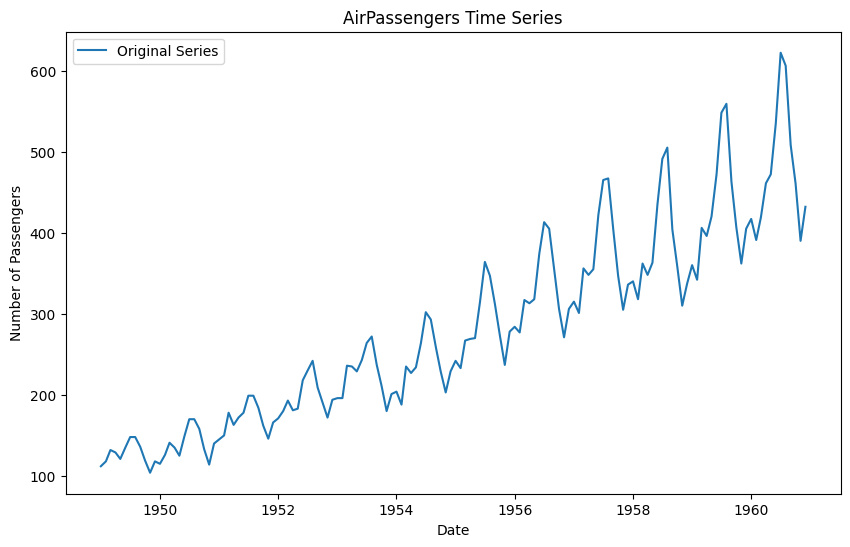

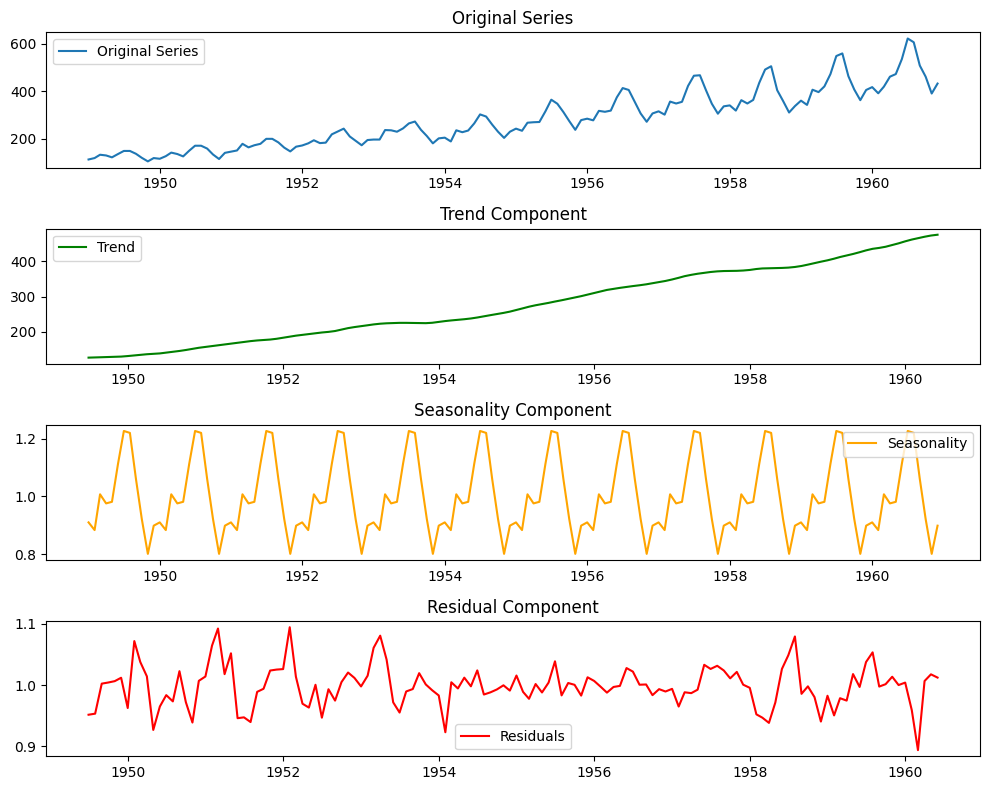

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers dataset from a URL
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original Series')
plt.title('AirPassengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Decompose the series into trend, seasonal, and residual components
# Assuming a yearly seasonality with 12 months
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Passengers'], label='Original Series')
plt.title('Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonality Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

#Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

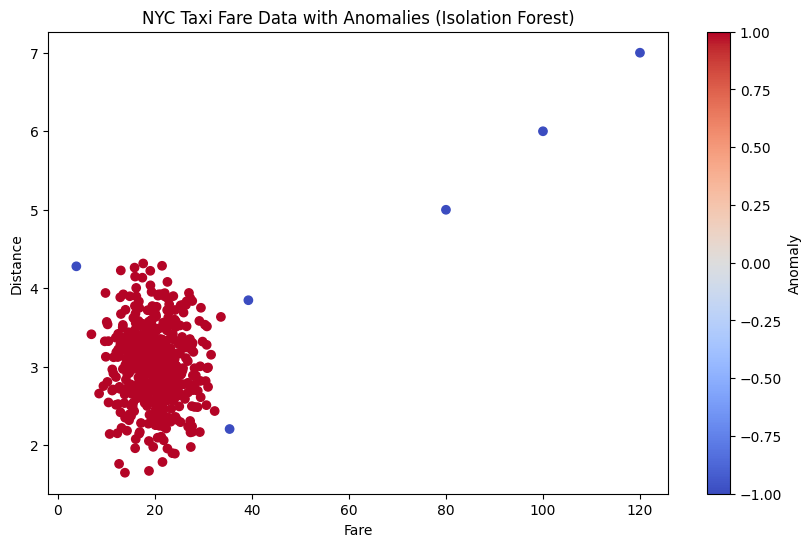

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Example dataset (NYC Taxi Fare data or any numerical dataset)
# For demonstration, let's generate a synthetic dataset

# Let's simulate some taxi fare data (random data)
np.random.seed(42)
data = {
    'fare': np.random.normal(loc=20, scale=5, size=500),  # Normally distributed fares
    'distance': np.random.normal(loc=3, scale=0.5, size=500)  # Normally distributed distance
}

df = pd.DataFrame(data)

# Introduce some anomalies (outliers) for testing
outliers = pd.DataFrame({
    'fare': [80, 100, 120],
    'distance': [5, 6, 7]
})
df = pd.concat([df, outliers], ignore_index=True)

# Standardize the data (important for anomaly detection)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01)  # Assuming 1% outliers
df['anomaly'] = iso_forest.fit_predict(scaled_data)

# Plot the data, highlighting anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['fare'], df['distance'], c=df['anomaly'], cmap='coolwarm', marker='o')
plt.title('NYC Taxi Fare Data with Anomalies (Isolation Forest)')
plt.xlabel('Fare')
plt.ylabel('Distance')
plt.colorbar(label='Anomaly')
plt.show()

#Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

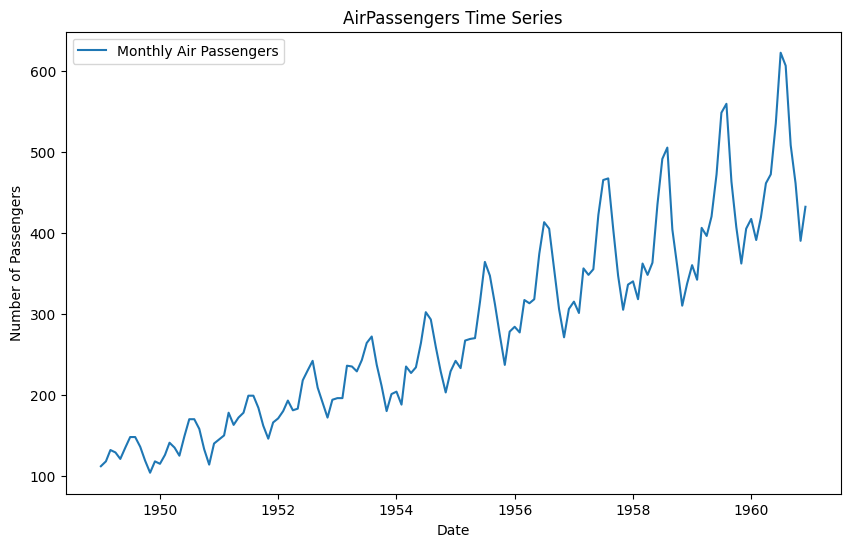

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


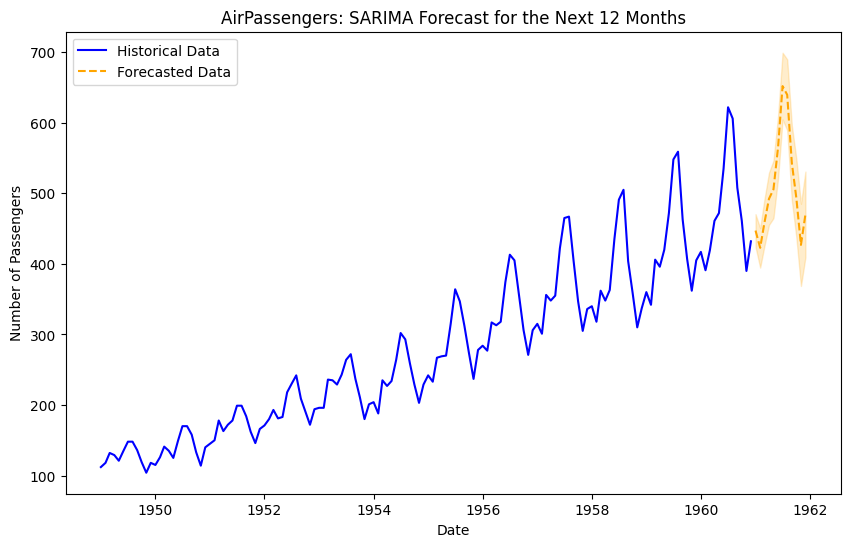

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Load the AirPassengers dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Visualize the original data
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Monthly Air Passengers')
plt.title('AirPassengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Train a SARIMA model
# SARIMA(p, d, q) x (P, D, Q, m), where:
# p, d, q: AR, I, MA components for non-seasonal part
# P, D, Q: Seasonal AR, I, MA components
# m: the number of periods in each season (12 for monthly data with yearly seasonality)

# You might need to tune the order (p, d, q) and seasonal_order (P, D, Q, m) for optimal results.
# For demonstration purposes, we'll use a common order for this dataset.
sarima_model = SARIMAX(data['Passengers'],
                       order=(1, 1, 1),         # p, d, q (non-seasonal parts)
                       seasonal_order=(1, 1, 1, 12), # P, D, Q, m (seasonal parts)
                       enforce_stationarity=False, enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit(disp=False) # disp=False suppresses optimization output

# Forecast the next 12 months
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:] # Start from the month after the last data point
forecast_values = forecast.predicted_mean

# Confidence intervals for the forecast
conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Passengers'], label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Data', color='orange', linestyle='--')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.2)
plt.title('AirPassengers: SARIMA Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

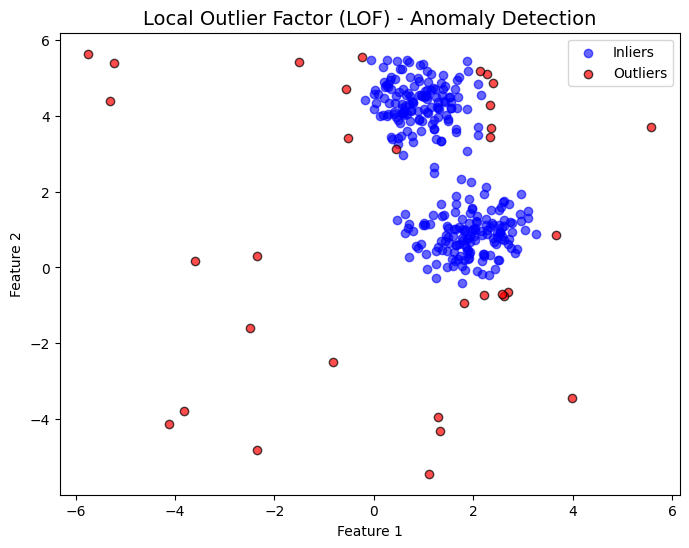

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

# Step 1: Generate a synthetic dataset
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

# Step 2: Introduce some outliers
np.random.seed(42)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))  # Random outliers
X_with_outliers = np.vstack([X, outliers])

# Step 3: Apply LOF to detect anomalies
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X_with_outliers)

# LOF returns -1 for outliers, 1 for inliers
# Step 4: Visualize the data
plt.figure(figsize=(8, 6))

# Plot inliers
plt.scatter(X_with_outliers[y_pred == 1][:, 0], X_with_outliers[y_pred == 1][:, 1],
            label='Inliers', color='blue', alpha=0.6)

# Plot outliers
plt.scatter(X_with_outliers[y_pred == -1][:, 0], X_with_outliers[y_pred == -1][:, 1],
            label='Outliers', color='red', edgecolor='black', alpha=0.7)

# Title and labels
plt.title("Local Outlier Factor (LOF) - Anomaly Detection", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()
plt.show()

# Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?

# Answer:

#### A. **Challenges**:

* The data comes in as a continuous stream (every 15 minutes).
* Energy consumption is influenced by various factors, including weather, time of day, and special events.
* The goal is to detect abnormal spikes or drops in real-time consumption to trigger alerts or automated corrective actions.

#### B. **Choosing the Right Model for Anomaly Detection**:

To detect anomalies in real-time, I’d consider several models that are well-suited for streaming or sequential data:

* **Isolation Forest**: This algorithm is effective for high-dimensional data and works well with a small amount of labeled data. It isolates anomalies by creating random splits in the data and identifying points that are isolated more easily. It is efficient for large datasets, which is important for real-time monitoring.

  **Why Isolation Forest?**

  * It is fast and can handle large datasets well.
  * It's an unsupervised learning model, meaning it doesn't require labeled data to detect anomalies.
  * It works well for high-dimensional features (e.g., timestamp, region, weather conditions, and energy usage).

* **Local Outlier Factor (LOF)**: LOF is useful for detecting anomalies based on the density of neighboring data points. It’s effective when you expect some clusters of data (e.g., typical energy usage behavior) and want to detect points that deviate from these clusters.

  **Why LOF?**

  * It works well if energy usage follows certain local patterns and the outliers deviate from those patterns.
  * It's good for detecting anomalies in smaller local regions, such as specific geographic areas or time frames.

* **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: If there is a spatial or temporal aspect to energy consumption (e.g., certain regions or times have similar behavior), DBSCAN can cluster similar data points and mark low-density regions as outliers.

  **Why DBSCAN?**

  * It works well when anomalies are region-based or temporal in nature.
  * It doesn't assume a specific distribution and can handle noise.
  * It can detect "spatial" anomalies if data from different regions shows different usage patterns.

**Recommended Approach**: For real-time anomaly detection, **Isolation Forest** would be a good choice because it is fast, scalable, and can be used to monitor changes in energy consumption over time, regardless of the number of regions or weather conditions.

#### C. **Implementing Anomaly Detection in Real-Time**:

* **Streaming Data**: The incoming data (every 15 minutes) can be handled using a sliding window or a rolling window technique. You can maintain the latest N observations and apply the model on them.
* **Online Learning**: Use an incremental learning approach to update the Isolation Forest model as new data arrives, avoiding retraining on the entire dataset every time.

### 2. **Short-Term Forecasting:**

#### A. **Challenges**:

* Energy consumption is highly time-dependent (e.g., hourly, daily, and seasonal patterns).
* Weather and other external factors influence demand.
* The forecast needs to be accurate in the short term (e.g., next 15 minutes to 1 hour) for operational decisions.

#### B. **Choosing the Right Time Series Model**:

* **ARIMA (AutoRegressive Integrated Moving Average)**: ARIMA is a widely used model for time series forecasting. It works well when the data exhibits linear trends and autocorrelations.

  **Why ARIMA?**

  * ARIMA is simple, interpretable, and widely used for short-term forecasting.
  * It’s suitable for univariate time series when the data doesn't have a clear seasonal pattern.
* **SARIMA (Seasonal ARIMA)**: If energy consumption has clear seasonal patterns (e.g., higher demand during certain hours of the day or seasons), SARIMA is more appropriate as it extends ARIMA to account for seasonality.

  **Why SARIMA?**

  * If there are significant daily, weekly, or yearly cycles in the energy demand, SARIMA’s seasonal components will help.
* **SARIMAX (Seasonal ARIMA with Exogenous Variables)**: Given that weather, holidays, and other external factors might influence energy usage, SARIMAX can be used to incorporate exogenous variables (like temperature, humidity, etc.) in the forecasting model.

  **Why SARIMAX?**

  * It allows for external variables (like temperature, wind speed) to be included in the model, which is crucial when predicting energy demand, as weather plays a significant role.
  * It’s more flexible than SARIMA since it can handle multiple predictors.

**Recommended Approach**: **SARIMAX** would be ideal for short-term forecasting because it can account for both seasonality (daily or weekly) and exogenous variables like weather.

#### C. **Real-Time Forecasting Implementation**:

* **Data Preprocessing**: Ensure that time-series data is aligned properly (e.g., time index, missing values handled).
* **Modeling**: Fit the SARIMAX model to historical energy data and update the model periodically (e.g., weekly or monthly).
* **Real-Time Prediction**: Use the latest data (including weather and time-based features) to forecast the next consumption value. Implement the forecasting model in real-time so that predictions can be made for the next 15 minutes.

### 3. **Validation and Monitoring**:

#### A. **Validation**:

* **Cross-validation**: Perform time-series cross-validation where the data is split into training and testing periods based on time, preserving the temporal ordering.
* **Metrics**: Use appropriate forecasting metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).
* **Anomaly Detection Metrics**: For anomaly detection, precision, recall, and F1-score can be used to measure how well outliers are identified.

#### B. **Monitoring**:

* **Real-Time Monitoring**: Set up real-time dashboards (e.g., using tools like Grafana or Power BI) to visualize energy usage, detected anomalies, and forecasted vs. actual values.
* **Performance Drift**: Over time, the model’s performance might degrade due to changing patterns in energy consumption. Monitor this by periodically testing the model on new data and retraining it if necessary.

### 4. **Business Decisions and Operational Impact**:

#### A. **Real-Time Insights**:

* **Demand Forecasting**: Accurate short-term forecasting enables the company to better manage resources and optimize energy distribution. It helps in predicting peak demand and planning for energy storage or procurement.
* **Anomaly Detection**: Detecting abnormal spikes or drops allows the grid operators to act quickly, preventing system overloads or addressing faults, ensuring grid stability.

#### B. **Operational Efficiency**:

* **Grid Management**: Knowing when energy consumption is expected to spike or drop helps grid operators preemptively manage load and dispatch energy resources, avoiding blackouts or overproduction.
* **Cost Savings**: Accurate demand forecasting helps avoid unnecessary energy purchases or penalties for over/under production.

#### C. **Strategic Decisions**:

* **Customer Behavior**: Understanding consumption patterns at different times of day, and in response to weather, can help the business offer tailored pricing or incentivize customers to shift demand.
* **Maintenance and Upgrades**: Detecting abnormal energy usage patterns can help identify failing equipment, demand surges due to events, or faulty grid sections that need attention.

### Conclusion:

By combining **real-time anomaly detection** (e.g., Isolation Forest) with **short-term forecasting** (e.g., SARIMAX), we can create an intelligent, data-driven solution for managing energy demand. The solution can help optimize grid operations, reduce costs, improve customer service, and support long-term strategic planning. Regular validation and monitoring of the models will ensure they remain accurate and relevant as conditions change over time.
